In [8]:
import numpy as np
import matplotlib.pyplot as plt
import basic
import curvedsky as cs
import cmb
from lenspyx.utils import camb_clfile

In [2]:

Tcmb  = 2.726e6    # CMB temperature
Lmax  = 3000       # maximum multipole of output normalization
rlmin, rlmax = 100, 3000  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
Lfac = (L*(L+1.))**2/(2*np.pi)

In [9]:
ucl = cmb.read_camb_cls('/global/homes/l/lonappan/softwares/cmblensplus/example/data/unlensedcls.dat',ftype='scal',output='array')[:,:rlmax+1]
lcl = cmb.read_camb_cls('/global/homes/l/lonappan/softwares/cmblensplus/example/data/lensedcls.dat',ftype='lens',output='array')[:,:rlmax+1]
pcl = camb_clfile('/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CAMB/BBSims_lenspotential.dat')

In [4]:
ocl = lcl.copy()

In [5]:
QDO = [True,True,True,True,True,False]

In [6]:
Ag, Ac, Wg, Wc = cs.norm_quad.qall('lens',QDO,Lmax,rlmin,rlmax,lcl,ocl)

 norm qTTTE
 norm qTTEE
 norm qTEEE
 norm qTBEB
 norm qMV
 norm qMV


In [14]:
 w = lambda ell : ell ** 2 * (ell + 1.) ** 2 * 0.5 / np.pi
 l = np.arange(6001)

(array([1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04,
        1.e-03]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

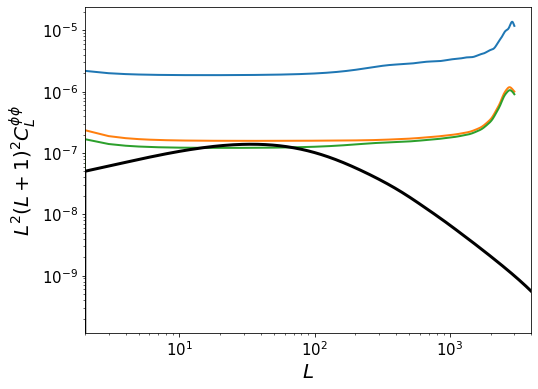

In [31]:
plt.figure(figsize=(8,6))
for qi, q in enumerate(['TT','TE','EE','TB','EB','MV']):
    if q in ["TE","TB","EE"]:
        continue
    plt.loglog(L,Lfac*Ag[qi,:]/.02,label=q,lw=2)
plt.loglog(pcl['pp']*w(l),c='k',lw=3)
#plt.legend()
plt.xlim(2,4000)
plt.xlabel('$L$', fontsize=20)
plt.ylabel('$L^2 (L + 1)^2 C_L^{\phi\phi}$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [34]:
1 - 1.18/1.33

0.1127819548872181